In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("hf://datasets/gradio/NYC-Airbnb-Open-Data/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Saving the uncleaned dataset 
df.to_csv(r'C:\Users\varun\Desktop\Airbnb\Dataset\Airbnb_Uncleaned.csv', index=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

##  Data Cleaning
#### 1. Convert the last_review from object to date
#### 2. Drop the rows where the name Nan
#### 3. Try to eliminate/replace NaN values in last_review and reviews_per_month
#### 4. Check for duplicates

In [6]:
df_transform = df.copy()
df_transform.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
# Converting data type from object to date
df_transform['last_review'] = pd.to_datetime(df_transform['last_review']).dt.date

In [8]:
# Counting how many NaN values does name have
df_transform['name'].isnull().sum()

16

In [9]:
# Dropping the rows where the name is NaN as dropping those columns won't make a difference
df_transform.dropna(subset= ['name'], inplace=True)

In [10]:
df_transform.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48879 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48879 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48879 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48879 non-null  object 
 5   neighbourhood                   48879 non-null  object 
 6   latitude                        48879 non-null  float64
 7   longitude                       48879 non-null  float64
 8   room_type                       48879 non-null  object 
 9   price                           48879 non-null  int64  
 10  minimum_nights                  48879 non-null  int64  
 11  number_of_reviews               48879 non-null  int64  
 12  last_review                     38837

In [11]:
# Creating a correlation matrix to check whether we can relate reviews_per_month with any other column
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

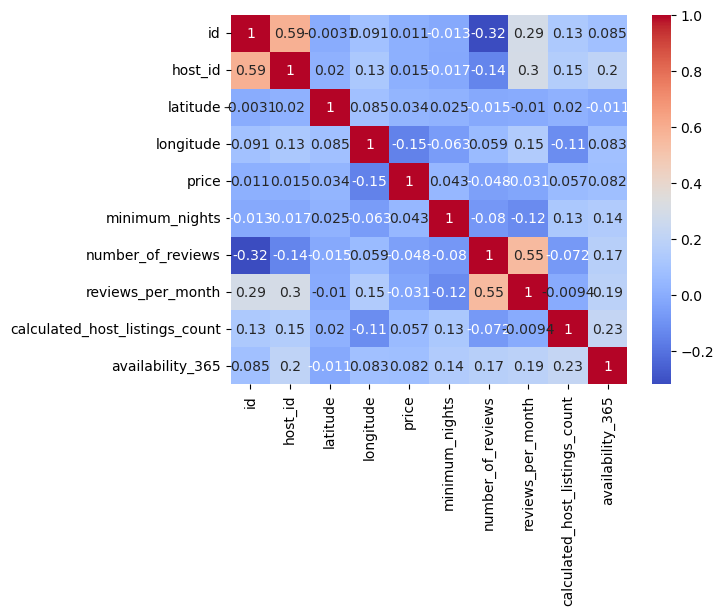

In [12]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [13]:
# We are grouping by number_of_reviews because it has the highest correlation
df_transform[(df_transform['last_review'].isnull())].groupby('number_of_reviews').size()

number_of_reviews
0    10042
dtype: int64

In [14]:
# Replacing reviews_per_month to 0.0 instead of NaN
df_transform.loc[(df_transform['reviews_per_month'].isnull()), 'reviews_per_month'] = 0.0

In [15]:
# Replacing reviews_per_month to '1900-01-01' instead of NaN
df_transform.loc[(df_transform['last_review'].isnull()), 'last_review'] = '1900-01-01'
df_transform['last_review'] = pd.to_datetime(df_transform['last_review'])

In [16]:
df_transform['name'].nunique()

47905

In [17]:
# Looking for duplicates
df_transform.duplicated().sum()

0

In [18]:
# Now storing the the cleaned data into a new dataframe
df_cleaned_data = df_transform.copy()

In [19]:
# Saving the cleaned dataset 
df_cleaned_data.to_csv(r'C:\Users\varun\Desktop\Airbnb\Dataset\Airbnb_Cleaned.csv', index=False)

In [20]:
df_cleaned_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1900-01-01,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## EDA on the Cleaned Airbnb Dataset
#### 1. What is the average listing price by neighborhood group?
#### 2. How does availability differ across room types?
#### 3. What is the price distribution across different room types and neighborhoods?
#### 4. What is the trend of reviews over time, and how does it correlate with room type and neighborhood group?
#### 5. Is there a relationship between price and availability, and does this vary by room type or neighborhood?
#### 6. Do hosts with multiple listings charge differently than those with fewer listings, and how does this differ by neighborhood?
#### 7. What is the estimated revenue potential by neighborhood, considering price and availability?

neighbourhood_group
Bronx             87.457798
Queens            99.517649
Staten Island    114.812332
Brooklyn         124.395711
Manhattan        196.877425
Name: price, dtype: float64


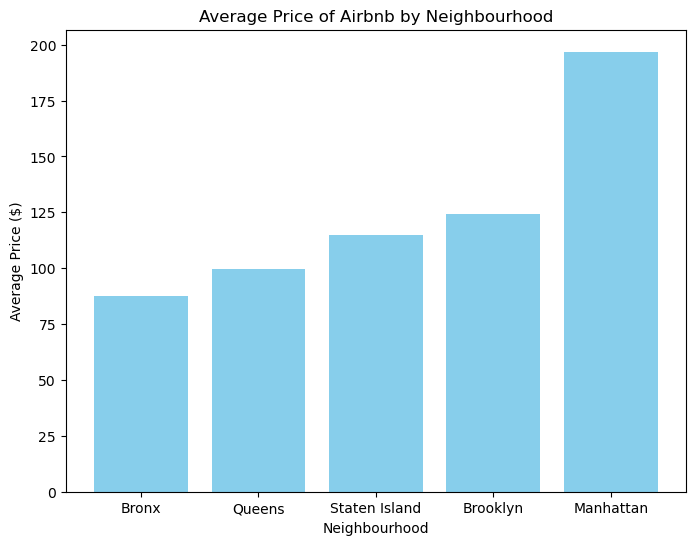

In [22]:
# What is the average listing price by neighborhood group?
# Gain basic insight into price variations across neighborhood groups

avg_price_by_neighbourhood = df_cleaned_data.groupby('neighbourhood_group')['price'].mean()
avg_price_by_neighbourhood = avg_price_by_neighbourhood.sort_values()
print(avg_price_by_neighbourhood)
plt.figure(figsize=(8, 6))
plt.bar(avg_price_by_neighbourhood.index, avg_price_by_neighbourhood.values, color='skyblue')
plt.title("Average Price of Airbnb by Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Average Price ($)")
plt.show()

room_type
Private room       111.227574
Entire home/apt    111.923471
Shared room        161.825712
Name: availability_365, dtype: float64


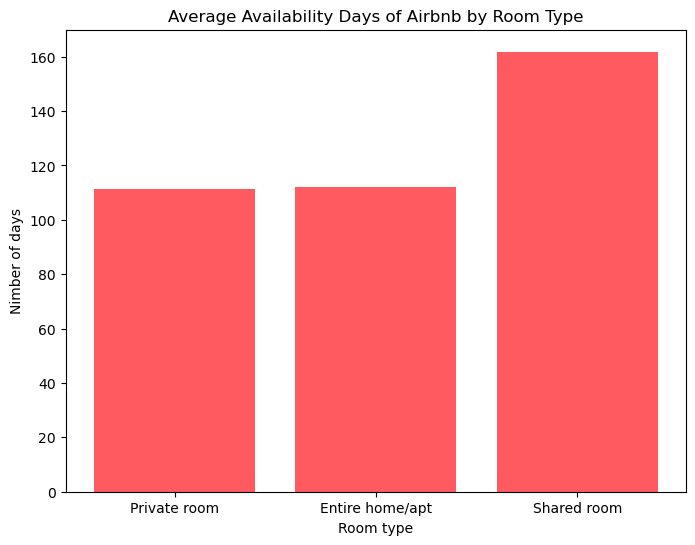

In [23]:
# How does availability differ across room types?
# Understand which room types are most available throughout the year

avg_availability_by_room = df_cleaned_data.groupby('room_type')['availability_365'].mean()
avg_availability_by_room = avg_availability_by_room.sort_values()
print(avg_availability_by_room)
plt.figure(figsize=(8, 6))
plt.bar(avg_availability_by_room.index, avg_availability_by_room.values, color='#FF5A5F')
plt.title("Average Availability Days of Airbnb by Room Type")
plt.xlabel("Room type")
plt.ylabel("Nimber of days")
plt.show()

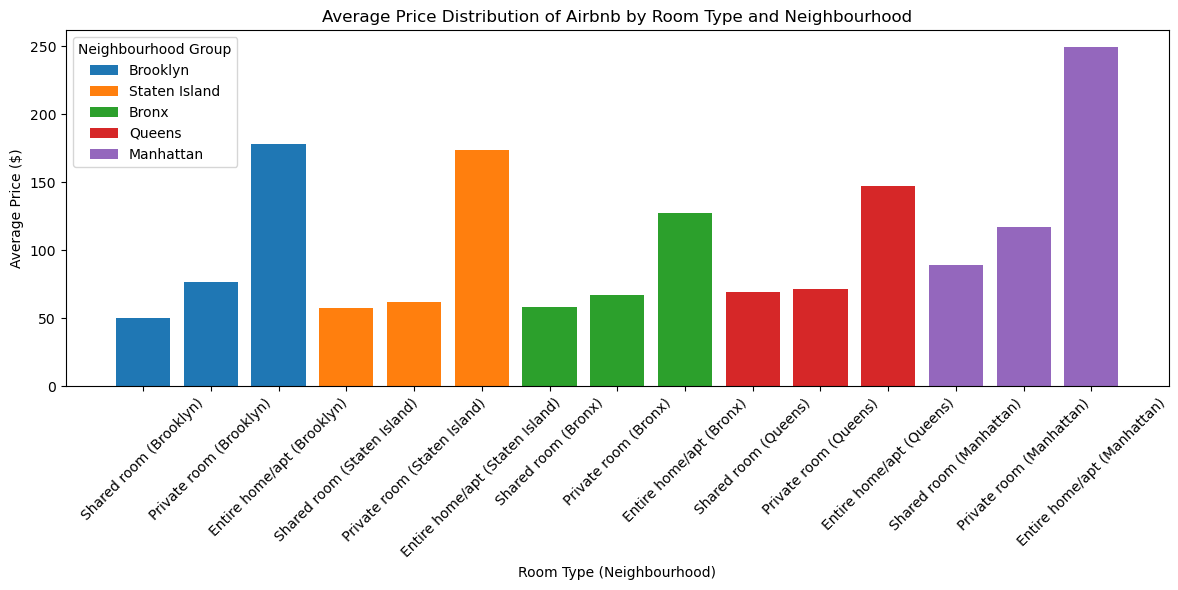

In [24]:
# What is the price distribution across different room types and neighborhoods?

avg_price_by_neighbourhood_room_type = df_cleaned_data.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()

# Sort values for better visualization
avg_price_by_neighbourhood_room_type = avg_price_by_neighbourhood_room_type.sort_values(by='price')

# Plotting
plt.figure(figsize=(12, 6))
for neighbourhood in avg_price_by_neighbourhood_room_type['neighbourhood_group'].unique():
    subset = avg_price_by_neighbourhood_room_type[avg_price_by_neighbourhood_room_type['neighbourhood_group'] == neighbourhood]
    plt.bar(subset['room_type'] + f' ({neighbourhood})', subset['price'], label=neighbourhood)

plt.title("Average Price Distribution of Airbnb by Room Type and Neighbourhood")
plt.xlabel("Room Type (Neighbourhood)")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=45)
plt.legend(title='Neighbourhood Group')
plt.tight_layout()
plt.show()

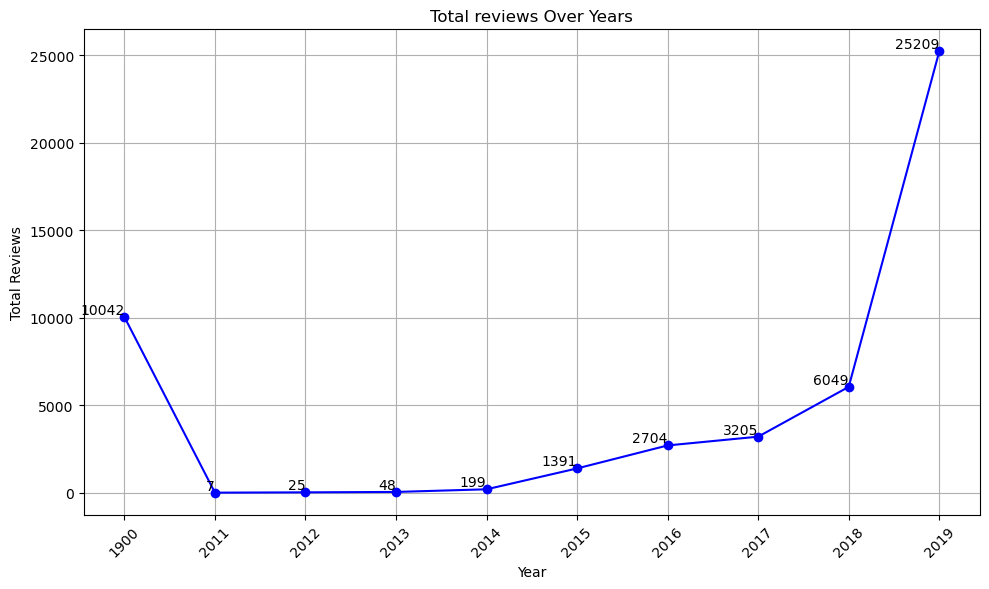

In [25]:
# What is the trend of reviews over time?
# Analyze guest review trends over time to see if certain periods have more reviews

line_chart = df_cleaned_data.groupby('last_review').size().reset_index(name='Count').sort_values(by='Count', ascending=False).reset_index().copy()
line_chart.drop(columns='index', axis=1, inplace=True)
line_chart['last_review'] = line_chart['last_review'].dt.strftime('%Y')
line_chart = line_chart.groupby('last_review')['Count'].sum().reset_index(name='Total Reviews').sort_values(by='last_review').reset_index()
line_chart.drop(columns='index', axis=1, inplace=True)

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(line_chart['last_review'], line_chart['Total Reviews'], marker='o', linestyle='-', color='b')

# Adding data labels
for i, value in enumerate(line_chart['Total Reviews']):
    plt.text(i, value, str(value), ha='right', va='bottom')
    
plt.title("Total reviews Over Years")
plt.xlabel("Year")
plt.ylabel("Total Reviews")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid()
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

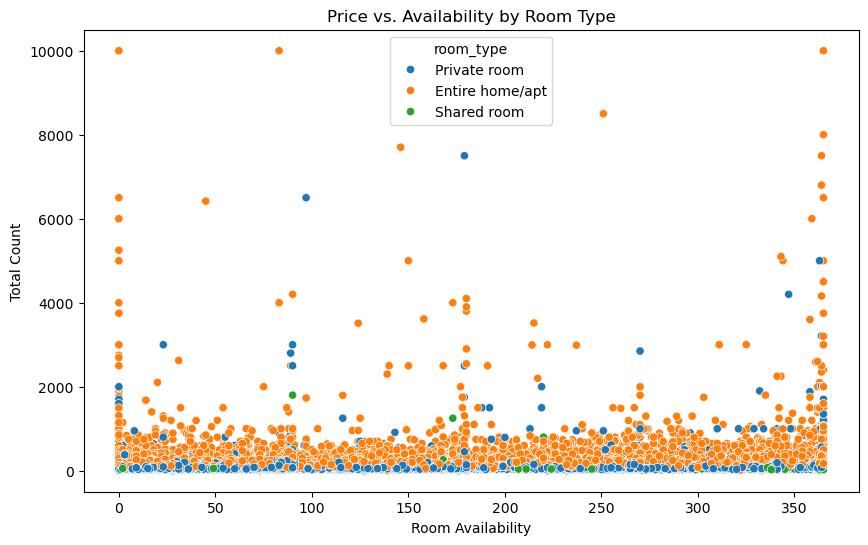

In [26]:
# Is there a relationship between price and availability, and does this vary by room type or neighborhood?

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned_data, x="availability_365", y="price", hue="room_type")
plt.title("Price vs. Availability by Room Type")
plt.xlabel("Room Availability")
plt.ylabel("Total Count")
plt.show()

In [27]:
# Do hosts with multiple listings charge differently than those with fewer listings, and how does this differ by neighborhood?
# Understand how host behavior (e.g., managing multiple listings) affects pricing strategies

avg_price_by_host_listings = df_cleaned_data.groupby(["calculated_host_listings_count", "neighbourhood_group"])["price"].mean().reset_index()

# Sort by `calculated_host_listings_count`, then `price`, then `neighbourhood_group`
avg_price_by_host_listings = avg_price_by_host_listings.sort_values(by=["calculated_host_listings_count", "price", "neighbourhood_group"])
avg_price_by_host_listings

,calculated_host_listings_count,neighbourhood_group,price
0,1,Bronx,88.217391
3,1,Queens,109.312560
1,1,Brooklyn,130.892410
4,1,Staten Island,145.252525
2,1,Manhattan,197.916774
...,...,...,...
106,103,Manhattan,44.111111
108,121,Manhattan,277.528926
109,232,Brooklyn,295.000000
110,232,Manhattan,303.221739


Text(0.5, 1.0, 'Revenue by Neighbourhood Group')

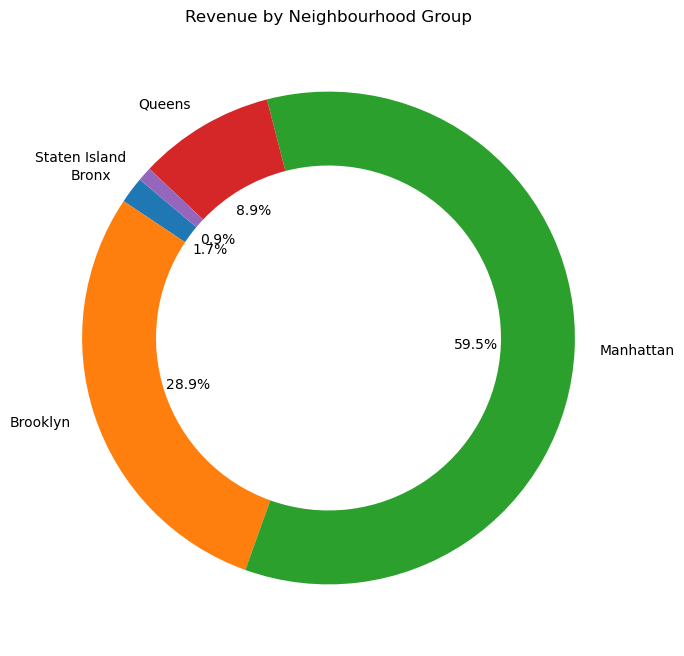

In [28]:
# What is the estimated revenue potential by neighborhood, considering price and availability?

df_cleaned_data['estimated_revenue ($)'] = df_cleaned_data['price'] * df_cleaned_data['availability_365']


# Calculate revenue potential by neighborhood to inform strategic pricing or investment decisions

revenue_by_neighbourhood = df_cleaned_data.groupby("neighbourhood_group")['estimated_revenue ($)'].sum().reset_index()
revenue_by_neighbourhood

labels = revenue_by_neighbourhood['neighbourhood_group']
sizes = revenue_by_neighbourhood['estimated_revenue ($)']

# Plot donut chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, startangle=140, autopct='%1.1f%%', wedgeprops={'width': 0.3})  # Set width to make it a donut chart)

# Add title
plt.title('Revenue by Neighbourhood Group')